Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups.

This project will use SVM with Sci Kit Learn

In [1]:
# Import tools
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import data set
from sklearn import datasets

# Use iris data
iris = datasets.load_iris()

In [3]:
# Grab features (X) and the Target (Y)
X = iris.data
Y = iris.target

print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
# Import the SVC (Support Vector Classification)
from sklearn.svm import SVC

In [6]:
# Fit a SVM model to the data
model = SVC()

In [8]:
# Split data into training and test data
from sklearn.cross_validation import train_test_split

D:\Program Files (x86)\ANACONDA\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.4, random_state=3)

In [15]:
# Fit the model using training data
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
from sklearn import metrics
# Check how well model fit data
pred = model.predict(X_test)
expected = Y_test

print metrics.accuracy_score(expected,pred)

0.966666666667


Explore the various kernel types than can be used for classification

1) Two linear models:LinearSVC() and SVC(kernel='linear') 

* LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

2) a Gaussian Radial Basis Function
3) a SVC with a polynomial (3rd Degree) kernel.

In [17]:
# Import all SVM 
from sklearn import svm 

In [28]:
# Use all the data with 2 features, no split
X = iris.data[:,:2]
Y = iris.target

In [29]:
# SVM regularization parameter
C=1.0 

In [30]:
# SVC with a Linear Kernel  
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [31]:
# Visual plot the results
# Set the step size
h = 0.02

In [33]:
# X axis min and max
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1

# Y axis min and max
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

In [34]:
# Use numpy to create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [35]:
# create title for plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

D:\Program Files (x86)\ANACONDA\lib\site-packages\matplotlib\contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


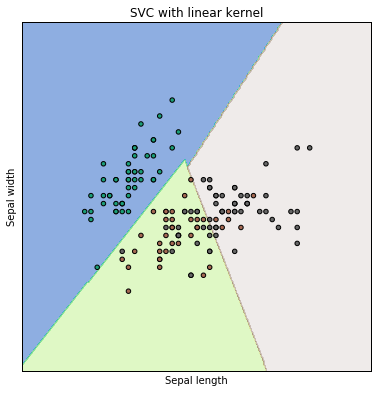

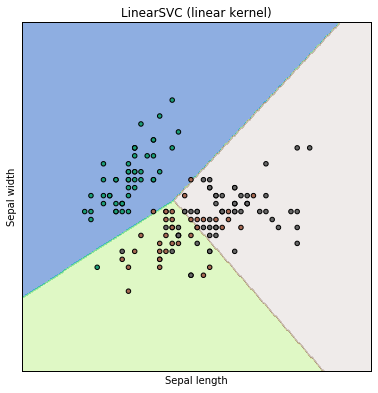

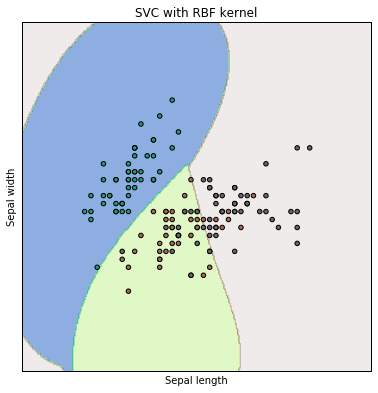

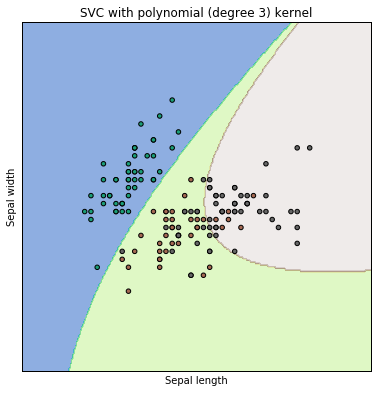

In [36]:
# Create a function to go through each model
for i, clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    # set up the figure size, point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2,2, i+1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    # Define Z as the prediction
    Z =clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()